# PubFL - Censorship-Resistant Federated Learning on Public Blockchains
### by Anton Wahrstätter, Sajjad Khan & Davor Svetinovic

## MNIST DATASET ROPSTEN SIMULATION

### Imports
The imports consist of the following:
* PytorchModel - which is the wrapper for the Convolutional Network
* FLManager - the wrapper for the Manager contract
* FLChallenge - the wrapper for the Challenge contract

In [1]:
from pytorch_model import PytorchModel
from smartcontracts import FLManager, FLChallenge

### Select data set

In [2]:
#DATASET = "cifar-10"
DATASET = "mnist"

### RPC Provider

The RPC provides the connection to the respective blockchain, for example Ethereum or the Robsten testnet.

In [3]:
with open("rpc_endpoint.txt", "r") as file:
    RPC_ENDPOINT = file.read()

### Configurations

In [4]:
NUMBER_OF_GOOD_CONTRIBUTORS = 4
NUMBER_OF_BAD_CONTRIBUTORS = 1
NUMBER_OF_FREERIDER_CONTRIBUTORS = 1
NUMBER_OF_INACTIVE_CONTRIBUTORS = 0

REWARD = int(1e18)
MINIMUM_ROUNDS = 8
MIN_BUY_IN = int(1e18)
MAX_BUY_IN = int(1.5e18)
STANDARD_BUY_IN = int(1e18)
EPOCHES = 1 #25
BATCH_SIZE = 32 #128
PUNISHFACTOR = 3
FIRST_ROUND_FEE = 50 # 20% OF MIN DEPOSIT

FORK = False # Fork Chain or communicate directly with RPC

NUMBER_OF_CONTRIBUTERS = NUMBER_OF_GOOD_CONTRIBUTORS      + \
                         NUMBER_OF_BAD_CONTRIBUTORS       + \
                         NUMBER_OF_FREERIDER_CONTRIBUTORS + \
                         NUMBER_OF_INACTIVE_CONTRIBUTORS

In [5]:
# Only for the real-net simulation
# In order to use a non-locally forked blockchain, 
# private keys are required to unlock accounts
if FORK == False:
    from web3 import Web3
    w3 = Web3(Web3.HTTPProvider(RPC_ENDPOINT))
    PRIVKEYS = []
    with open("private_keys.txt", "r") as file:
        for f in file:
            PRIVKEYS.append(f.split(":")[0])

    PRIVKEYS = [w3.eth.account.privateKeyToAccount(i) for i in PRIVKEYS]

### Initialized Deep Learning Model and add Participants

In [6]:
pytorch_model = PytorchModel(DATASET, 
                             NUMBER_OF_GOOD_CONTRIBUTORS, 
                             NUMBER_OF_CONTRIBUTERS, 
                             EPOCHES, 
                             BATCH_SIZE, 
                             STANDARD_BUY_IN,
                             MAX_BUY_IN)


for i in range(NUMBER_OF_BAD_CONTRIBUTORS):
    pytorch_model.add_participant("bad",3)

for i in range(NUMBER_OF_FREERIDER_CONTRIBUTORS):
    pytorch_model.add_participant("freerider",1)
    
for i in range(NUMBER_OF_INACTIVE_CONTRIBUTORS):
    pytorch_model.add_participant("inactive",1)

Data Loaded:
Nr. of images for training: 60,000
Nr. of images for testing:  10,000

Pytorch Model created:

Net_MNIST(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Bad User
Participant added: Freerider User


### Initialize and Deploy Manager Contract

In [7]:
manager = FLManager(pytorch_model, True).init(NUMBER_OF_GOOD_CONTRIBUTORS, 
                                              NUMBER_OF_BAD_CONTRIBUTORS,
                                              NUMBER_OF_FREERIDER_CONTRIBUTORS,
                                              NUMBER_OF_INACTIVE_CONTRIBUTORS,
                                              MINIMUM_ROUNDS,
                                              RPC_ENDPOINT,
                                              FORK,
                                              PRIVKEYS)
manager.buildContract()

Connected to Ethereum: True
initiated Ganache-Client @ Block Nr. 12,562,749

Total Contributers:       6
Good Contributers:        4 (67%)
Malicious Contributers:   1 (17%)
Freeriding Contributers:  1 (17%)
Inactive Contributers:    0 (0%)
Learning Rounds:          8
-----------------------------------------------------------------------------------
Account initiated @ Address 0xa093d826b7834cf3d6b3c33... with 10.0 ETH | FAIR USER
Account initiated @ Address 0xCbE148e7A6a59cb87c11F27... with 1.5  ETH | FAIR USER
Account initiated @ Address 0xF687baD1fa3Dd19AA7D3072... with 1.5  ETH | FAIR USER
Account initiated @ Address 0x3817E1584b47263457dfa3B... with 1.5  ETH | FAIR USER
Account initiated @ Address 0x412F3D88BFF53F63FDF584B... with 1.5  ETH | MAL. USER
Account initiated @ Address 0x68b6F67976cce613ec994B5... with 1.5  ETH | FREE USER
-----------------------------------------------------------------------------------

Manager deployed  @ Address 0x76b1F9fC58Fec27e375cCDfD9af81FBf069

### Deploy Challenger Contract and Start Simulation

In [8]:
configs = manager.deployChallengeContract(MIN_BUY_IN,
                                          MAX_BUY_IN,
                                          REWARD, 
                                          MINIMUM_ROUNDS,
                                          PUNISHFACTOR,
                                          FIRST_ROUND_FEE)

model = FLChallenge(manager, 
                    configs,
                    pytorch_model)


model.simulate(rounds=MINIMUM_ROUNDS)

Starting simulation...
-----------------------------------------------------------------------------------

Model deployed    @ Address 0x7c3B0cFc641AFEf7476D3B7f3c330825f77C2809 | 0x0a98...

-----------------------------------------------------------------------------------
Account registered: 0xa093d826b7834c... | 0x0a98... | 1,000,000,000,000,000,000 WEI
Account registered: 0xCbE148e7A6a59c... | 0x3a0f... | 1,100,000,000,000,000,000 WEI
Account registered: 0xF687baD1fa3Dd1... | 0x40c4... | 1,200,000,000,000,000,000 WEI
Account registered: 0x3817E1584b4726... | 0xa49d... | 1,250,000,000,000,000,000 WEI
Account registered: 0x412F3D88BFF53F... | 0x7e67... | 1,300,000,000,000,000,000 WEI
Account registered: 0x68b6F67976cce6... | 0xb034... | 1,350,000,000,000,000,000 WEI
-----------------------------------------------------------------------------------
Address 0x68b6F67976cce6... going to switch attitude to freerider

=========================== FEDERATED LEARNING START ================

### Visualize Simulation 

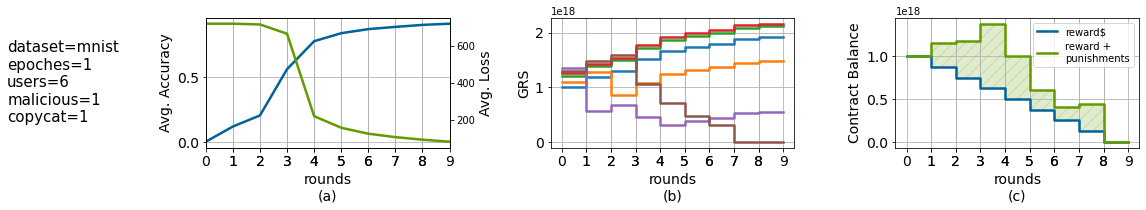

In [9]:
model.visualize_simulation()

### Transactions

In [10]:
print("{:<10} - {:^64} -    Gas Used - {}".format("Function", "Transaction Hash", "Success"))
print("------------------------------------------------------------------------------------------")
for f, txhash in model.txHashes:
    r = model.w3.eth.waitForTransactionReceipt(txhash)
    if r["status"] == 1:
        success = "✅"
    else:
        success = "FAIL"
    
    gas = r["gasUsed"]
    print("{:<10} - {} - {:>9,.0f} -   {}".format(f, txhash, gas, success))

Function   -                         Transaction Hash                         -    Gas Used - Success
------------------------------------------------------------------------------------------
register   - 0x3a0f600f1fa5312f99be2752765107aff097a5f34964207bf478b0c966a8e23a -   127,396 -   ✅
register   - 0x40c4ed39dcefbf65020804d4437849dcc4d5a0fdc93d405ee19e699e5a77b714 -   127,396 -   ✅
register   - 0xa49dd23799f62b12f27dde105bba4096c21a0fc20f08bc7669b7ee94475ab10c -   127,396 -   ✅
register   - 0x7e67db80321bdd85f5bed99c6e1cb09be0b4b49b05dfd3cbf9d35609d4958bbc -   127,396 -   ✅
register   - 0xb034d169eae6bf94601cbf4d63324ba0c32cc569903dc8dead32405f891dcbb2 -   127,396 -   ✅
slot       - 0xd5876ebb02d7c0d547074e4756e1871f4a41f4678e118ebf7966acf8652c5f0f -    51,185 -   ✅
slot       - 0x4ecbebf4693acffea9e549420850ba43380f85625416a3bb5cb8fb36e8177423 -    51,185 -   ✅
slot       - 0x756fbfeff293d25a2b0926302e8760339779d0fc58784bde96fe93817b247052 -    51,185 -   ✅
slot       - 0x1a814727

### Contracts and Paricipants (Latex format)

In [13]:
print("\\renewcommand{\\arraystretch}{1.3}")
print("\\begin{center}")
print("\\begin{tabular}{ c|c }")

print("Contract & Address (Ropsten Testnet) \\\ ")
print("\\hline")
print("Ma-1 & {} \\\ ".format(manager.manager.address))
print("Ch-1 & {} \\\ ".format(model.model.address))
for i, p in enumerate(model.pytorch_model.participants[:-1] + \
                           model.pytorch_model.disqualified + \
                           [model.pytorch_model.participants[-1]]):
    print("P-{}  & {} \\\ ".format(i+1, p.address))

print("\\end{tabular}")
print("\\end{center}")

\renewcommand{\arraystretch}{1.3}
\begin{center}
\begin{tabular}{ c|c }
Contract & Address (Ropsten Testnet) \\ 
\hline
Ma-1 & 0x76b1F9fC58Fec27e375cCDfD9af81FBf069bD038 \\ 
Ch-1 & 0x7c3B0cFc641AFEf7476D3B7f3c330825f77C2809 \\ 
P-1  & 0xa093d826b7834cf3d6b3c33606E4e3b5D7Fd8A26 \\ 
P-2  & 0xCbE148e7A6a59cb87c11F275eb2452f32E3B51ea \\ 
P-3  & 0xF687baD1fa3Dd19AA7D30722BaA251aaAd7B1766 \\ 
P-4  & 0x3817E1584b47263457dfa3B1C3fFeD3beC1e3C07 \\ 
P-5  & 0x412F3D88BFF53F63FDF584Bc796493217235f7A4 \\ 
P-6  & 0x68b6F67976cce613ec994B5fc720BF534795c3B9 \\ 
\end{tabular}
\end{center}


### Table with Gas Info (Latex format)

In [14]:
reg = model.gas_register, "register"
fed = model.gas_feedback, "feedback"
clo = model.gas_close, "settle round"
slo = model.gas_slot, "reserve slot"
wei = model.gas_weights, "provide weights**"
dep = manager.gas_deploy, "deployment"
dep = manager.gas_deploy, "deployment"
ext = model.gas_exit, "exit"

tot  = 0
tot2 = 0

print("\\begin{tabular}{ |c|c|c| }\n\hline\nFunction & Gas Amount & Gas Costs*\\\ \n\hline")
for i, f in [reg,slo,wei,fed,clo]:
    print("{} & {:,.0f} & {:.5f} ETH \\\ ".format(f, sum(i)/len(i), sum(i)/len(i) * 20e9 / 1e18 ))
    tot += sum(i)/len(i)
    if i != clo[0]:
            tot2 += sum(i)/len(i)
        
print("\hline\n\hline")
print("complete round & {:,.0f} & {:.5f} \\\ ".format(tot, tot * 20e9 / 1e18))
print("\hline\n\end{tabular}")

\begin{tabular}{ |c|c|c| }
\hline
Function & Gas Amount & Gas Costs*\\ 
\hline
register & 127,396 & 0.00255 ETH \\ 
reserve slot & 51,184 & 0.00102 ETH \\ 
provide weights** & 60,492 & 0.00121 ETH \\ 
feedback & 262,669 & 0.00525 ETH \\ 
settle round & 528,030 & 0.01056 ETH \\ 
\hline
\hline
complete round & 1,029,771 & 0.02060 \\ 
\hline
\end{tabular}
